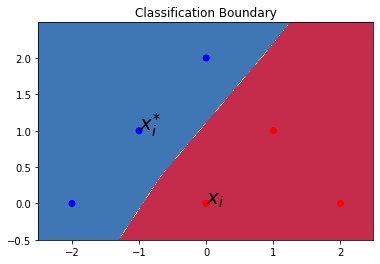

In [1]:
# -*- coding: UTF-8 -*- 
import numpy as np
from sklearn.neural_network import MLPClassifier  
import matplotlib.pyplot as plt
%matplotlib inline

X = np.array([[0., 0.], [1., 1.], [-1.,1.], [0.,2.], [-2.,0.], [2.,0.]])  
y = np.array([0,0,1,1,1,0])  

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,  
                hidden_layer_sizes=(5, 2), random_state=1)  

clf.fit(X, y)
def plot_decision_boundary(pred_func):  

    # 设定最大最小值，附加一点点边缘填充  
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5  
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5  
    h = 0.01  

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))  

    # 用预测函数预测一下  
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])  
    Z = Z.reshape(xx.shape)  

    # 然后画出图  
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)

    cValue_1 = ['r','r','b','b','b','r']
    plt.Circle((-1, 1), 1, color='black', fill=True)
    plt.scatter(X[:, 0], X[:, 1], c=cValue_1, cmap=plt.cm.Spectral)
    plt.annotate(r'$x_i$', (0,0), fontsize = 20)
    plt.annotate(r"$x_i^{*}$", (-1,1), fontsize = 20)
   

plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Classification Boundary")
plt.show()

In [2]:
from sklearn.neighbors import DistanceMetric
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import LocalOutlierFactor
from scipy.spatial import distance
import math
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


print(__doc__)

np.random.seed(42)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

w = np.array([2, -1])
b = np.array([-1])
inputx = np.array([-4, 4])
cf = ccf = inputx
pred = sigmoid(cf.dot(w) + b)

while (pred < 0.8):
    gradient = pred * (1-pred) * w
    gradient = gradient / np.linalg.norm(gradient)
    #print(pred, gradient)
    cf = cf + 0.1 * gradient
    pred = sigmoid(cf.dot(w) + b)

print(cf)

ccf = cf
pred = sigmoid(ccf.dot(w) + b)
while (pred > 0.2):
    gradient = pred * (1-pred) * w
    gradient = gradient / np.linalg.norm(gradient)
    #print(pred, gradient)
    ccf = ccf - 0.1 * gradient
    pred = sigmoid(ccf.dot(w) + b)
    
print(ccf)

Automatically created module for IPython interactive environment
[1.81377674 1.09311163]
[0.56157867 1.71921066]


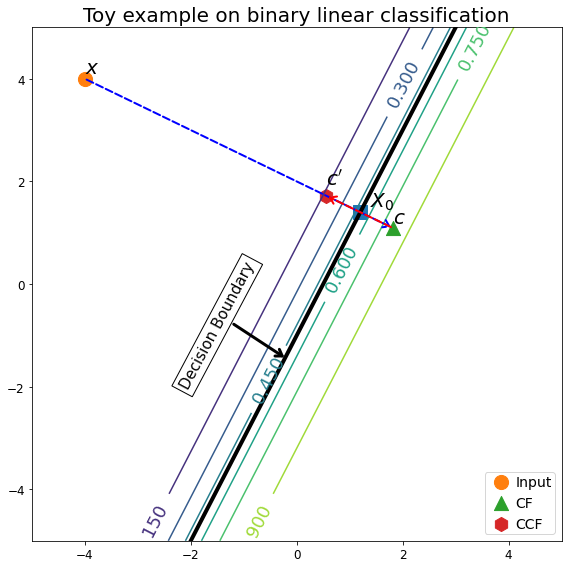

In [8]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
dplot = np.c_[xx.ravel(), yy.ravel()]

x1 = np.linspace(-5, 5, 1000)
y1 = 2* x1 - 1


pred = sigmoid(dplot.dot(w) + b)
S = pred.reshape(xx.shape)

sample_positive = dplot[np.where(pred == 0)]
sample_negative = dplot[np.where(pred == 1)]

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=12)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8, 8)
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
CS = ax.contour(xx, yy, S)
ax.clabel(CS, fontsize=18, inline=1)
ax.plot(x1, y1, linestyle = 'solid', linewidth = 4, c = 'black')
#ax.legend(loc = 'upper right', fontsize = 14, handletextpad = 0, columnspacing = 0, borderpad = 0.2)
ax.scatter(inputx[0], inputx[1], marker = "o", s = 200, label = "Input", color = '#ff7f0e')
ax.scatter(cf[0], cf[1], marker = "^", s = 200, label = "CF", color = '#2ca02c')
ax.scatter(ccf[0], ccf[1], marker = "h", s = 200, label = "CCF", color = '#d62728')
ax.scatter((cf[0] + ccf[0])/2, (cf[1] + ccf[1])/2, marker = "s", s = 200, color = '#1f77b4')

ax.annotate("", xy=(cf[0], cf[1]), xytext=(inputx[0], inputx[1]), arrowprops=dict(arrowstyle="->, head_length=0.6, head_width=0.4", color='blue', ls='--', linewidth = 2))
ax.annotate("", xy=(ccf[0], ccf[1]), xytext=(cf[0], cf[1]), arrowprops=dict(arrowstyle="->, head_length=0.6, head_width=0.4", color = 'red', ls = '--', linewidth = 2))

ax.text(-1.5, -0.8, 'Decision Boundary', horizontalalignment='center', 
        verticalalignment='center', bbox=dict(facecolor='none', edgecolor='black'),
        fontsize = 15, rotation = 62)
ax.annotate("", xy = (-0.2, -1.45) , xytext = (-1.22, -0.76), arrowprops=dict(arrowstyle="->, head_length=0.6, head_width=0.4", linewidth = 3))

ax.legend(loc = 'lower right', fontsize = 14, handletextpad = 0, columnspacing = 0, borderpad = 0.2)
ax.text(inputx[0], inputx[1] + 0.1, r'$x$', fontsize=20)
ax.text(cf[0], cf[1]+0.1, r'$c$', fontsize=20)
ax.text(ccf[0], ccf[1] + 0.2, r'$c^{\prime}$', fontsize=20)
ax.text((cf[0] + ccf[0])/2 + 0.2, (cf[1] + ccf[1])/2 + 0.1, r'$X_0$', fontsize = 20)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_title("Toy example on binary linear classification", fontsize = 20)
plt.tight_layout()
plt.savefig("Toy Example.pdf", dpi = 300)
plt.show()